# Descrição

O objetivo desse script é rastrear todas as nossas opções de ações e ETF's da dinâmica para pegar os valores ajustados das ações. Assim, podemos pegar esses dados para manipular via Excel e tomar decisões de gerenciamento de carteira como abaixo:
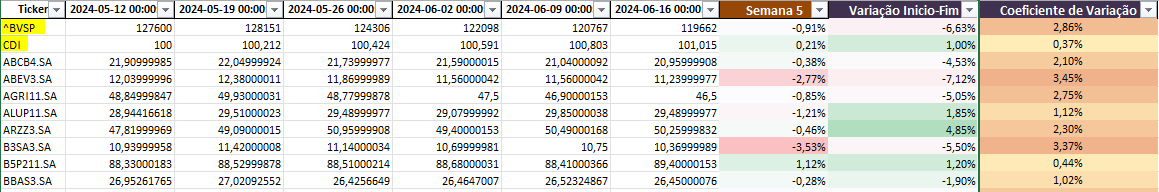 \
Trago na primeira linha ainda dados sobre o Índice Bovespa e o CDI para ver como está se comportando o componente de Renda Fixa.
Com esse código pegamos esses valores ajustados e podemos ver qual ação foi melhor ou pior durante a dinâmica, tirando insights importantes.

Obs.: O CDI uma conta simpres, se tu tivesse 100 reais e colocasse no dia e carregasse até o fim da semanano final daquela semana? Daí esse valor vai sendo carregado, como se fosse o valor de uma ação.

# Bibliotecas

In [1]:
# Fonte de Dados Ações
import yfinance as yf

# Manipular dados
import pandas as pd
import numpy as np
import datetime

# Pegar a série do CDI
from bcb import sgs

# Entradas do Código

In [2]:
acoesBrTreinee = pd.read_csv('AT_BR.txt')
ETFsTreinee = pd.read_csv('AT_ETF.txt')

acoesBrTreinee = list(acoesBrTreinee['AT_BR'].values)
ETFsTreinee = list(ETFsTreinee['AT_EXTR'].values)

listagemTreinee = ['^BVSP', 'CDI'] + acoesBrTreinee + ETFsTreinee

# Processo de Automação do Código

In [3]:
def varrerHistorico(ticker):
    dadosTicker = yf.download(ticker, start='2024-05-10')
    dadosTicker = dadosTicker['Adj Close'].resample('W').last()

    dadosTicker = pd.DataFrame({'index': dadosTicker.index, ticker: dadosTicker.values})

    dadosTicker = dadosTicker.transpose()
    dadosTicker.columns = dadosTicker.iloc[0]
    dadosTicker = dadosTicker[1:]
    dadosTicker = dadosTicker.reset_index()
    dadosTicker = dadosTicker.rename(columns={'index': 'Ticker'})
    return dadosTicker

def definirCDI(ticker):
    cdi = sgs.get({'CDI': 12}, start='2024-05-10')

    cdi = cdi.resample('W').last()

    cdi['Eq. Fin'] = np.where(cdi.index == '2024-05-12 00:00:00',
                        round(((1+cdi['CDI'])**(0)-1)/100, 5), # Valor no dia inicial vai ser valor inicial
                        np.where(cdi.index == '2024-06-02 00:00:00',
                                    round(((1+cdi['CDI'])**(4)-1)/100, 5), # Aqui tem um feriado
                                    round(((1+cdi['CDI'])**(5)-1)/100, 5))) # Aqui rende toda a semana

    cdi['Acumulado'] = cdi['Eq. Fin'].cumsum()

    cdi['CDI'] = ((1 + cdi['Acumulado']*100)-1)+100

    cdi = cdi.transpose()
    cdi = cdi[:1]
    cdi.reset_index(inplace=True)
    cdi = cdi.rename(columns={'index': 'Ticker'})
    return cdi

In [4]:
BaseDadosCodigos = pd.DataFrame()

for codigo in listagemTreinee:
     if codigo != 'CDI':
          dfCodigo = varrerHistorico(codigo)
     else:
          dfCodigo = definirCDI(codigo)
     BaseDadosCodigos = pd.concat([BaseDadosCodigos, dfCodigo])
     BaseDadosCodigos.reset_index(drop=True, inplace=True)

[*********************100%%**********************]  1 of 1 completed
c:\Users\RENAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\indexes\base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)
[*********************100%%**********************]  1 of 1 completed
c:\Users\RENAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\indexes\base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)
[*********************100%%**********************]  1 of 1 completed
c:\Users\RENAN\AppData\Local\Progra

# Exportar Informações para Realizar o Rastreio das Opções

In [5]:
BaseDadosCodigos.to_excel(r'DadosAcoesTreinee.xlsx', index=False)

Agora é só abrir o Excel e explorar os dados para ver os retornos da semana!